## 30 yrs Stock Market Data Analysis(Linear Regression in ML)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data consists of 30-years of Close prices for various market indexes, commodities, agriculture and US Treasure Bills.Yahoo Finance Python API. Stock market data spanning 30 years can provide a rich source of information for analysis and modeling. If you have a specific task or analysis you'd like to perform on this data, or if you have any questions about how to work with it using Python and libraries like Pandas, NumPy, Seaborn, or Matplotlib, feel free to ask.

#### Here are a few common tasks you might consider:

Exploratory Data Analysis (EDA): Explore the general characteristics of the data, visualize trends, and identify outliers.

Calculating Returns: Compute daily, weekly, or monthly returns from the stock prices.

Statistical Analysis: Conduct statistical tests or calculate descriptive statistics to better understand the data.

Visualizations: Create various plots such as line charts, candlestick charts, or histograms to visualize different aspects of the stock data.

Modeling: If you're interested in predictive modeling, you can use the data to train machine learning models for stock price prediction.


In [2]:
stock_data = pd.read_csv('30_yr_stock_market_data.csv')
stock_data.head(5)

Date  Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
0  1993-11-29       3677.800049      751.539978      461.899994   
1  1993-11-30       3683.949951      754.390015      461.790009   
2  1993-12-01       3697.080078      763.809998      461.890015   
3  1993-12-02       3702.110107      766.729980      463.109985   
4  1993-12-03       3704.070068      772.219971      464.890015   

   NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
0            2697.040039           250.139999                   14.12   
1            2694.080078           250.410004                   13.76   
2            2699.159912           252.610001                   13.83   
3            2705.179932           252.910004                   13.51   
4            2714.699951           253.860001                   12.69   

   DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  ...  \
0         2052.090088       3135.800049             9012.799805  ...   
1         2052.919922       3166.899902             9125.200195  ...   
2         2089.770020       3233.199951             9254.000000  ...   
3         2099.760010       3223.899902             9238.200195  ...   
4         2128.300049       3234.199951             9294.400391  ...   

   Crude Oil-WTI (CL=F)  Copper (HG=F)  Gold (GC=F)  Palladium (PA=F)  \
0                   NaN            NaN          NaN               NaN   
1                   NaN            NaN          NaN               NaN   
2                   NaN            NaN          NaN               NaN   
3                   NaN            NaN          NaN               NaN   
4                   NaN            NaN          NaN               NaN   

   Platinum (PL=F)  Silver (SI=F)  Treasury Yield 5 Years (^FVX)  \
0              NaN            NaN                          5.075   
1              NaN            NaN                          5.146   
2              NaN            NaN                          5.132   
3              NaN            NaN                          5.146   
4              NaN            NaN                          5.175   

   Treasury Bill 13 Week (^IRX)  Treasury Yield 10 Years (^TNX)  \
0                          3.11                           5.732   
1                          3.14                           5.795   
2                          3.11                           5.783   
3                          3.11                           5.778   
4                          3.11                           5.783   

   Treasury Yield 30 Years (^TYX)  
0                           6.226  
1                           6.286  
2                           6.268  
3                           6.263  
4                           6.258  

[5 rows x 33 columns]

In [3]:
stock_data.columns

Index(['Date', 'Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)',
       'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)',
       'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)',
       'Hang Seng Index (^HSI)', 'Cocoa (CC=F)', 'Coffee (KC=F)',
       'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)',
       'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)',
       'Wheat (ZW=F)', 'Ethanol (EH=F)', 'Heating Oil (HO=F)',
       'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)',
       'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)',
       'Silver (SI=F)', 'Treasury Yield 5 Years (^FVX)',
       'Treasury Bill 13 Week (^IRX)', 'Treasury Yield 10 Years (^TNX)',
       'Treasury Yield 30 Years (^TYX)'],
      dtype='object')

In [4]:
stock_data.describe()

Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
count       7555.000000     7555.000000     7555.000000   
mean       14874.059387     4223.712258     1731.212676   
std         8510.822131     3691.005799     1054.231841   
min         3593.350098      693.789978      438.920013   
25%         9461.330078     1859.650024     1081.415039   
50%        11336.320312     2561.600098     1331.290039   
75%        18082.794922     5098.110107     2111.724976   
max        36799.648438    16057.440430     4796.560059   

       NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
count            7555.000000          7555.000000             7555.000000   
mean             8579.929613           886.886216               19.870349   
std              3625.209982           535.402652                8.177532   
min              2570.899902           235.160004                9.140000   
25%              6103.635010           461.294998               13.940000   
50%              7831.979980           711.919983               18.150000   
75%             10914.669922          1228.904968               23.425000   
max             17353.759766          2442.739990               82.690002   

       DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  \
count         7604.000000       7578.000000             7402.000000   
mean          7525.672133       5747.179817            18321.661946   
std           3928.859211       1260.307172             6319.816948   
min           1911.699951       2876.600098             6660.419922   
25%           4492.372559       4896.325195            12545.547363   
50%           6512.445068       5924.350098            19110.515625   
75%          10735.822266       6707.199951            23256.157227   
max          16469.750000       8014.299805            33154.121094   

       Cocoa (CC=F)  ...  Crude Oil-WTI (CL=F)  Copper (HG=F)  Gold (GC=F)  \
count   5995.000000  ...           5842.000000    5837.000000  5833.000000   
mean    2248.069558  ...             64.154555       2.694865  1104.802451   
std      685.170089  ...             25.507924       1.100186   528.688117   
min      674.000000  ...            -37.630001       0.604000   255.100006   
25%     1697.000000  ...             44.750000       2.051500   612.400024   
50%     2341.000000  ...             62.004999       2.920500  1219.900024   
75%     2769.000000  ...             83.805000       3.496000  1519.599976   
max     4370.000000  ...            145.289993       4.929000  2067.899902   

       Palladium (PA=F)  Platinum (PL=F)  Silver (SI=F)  \
count       5542.000000      5302.000000    5835.000000   
mean         856.593297      1060.525895      16.535987   
std          645.733873       365.485434       8.322794   
min          148.500000       412.000000       4.026000   
25%          355.799988       847.799988      10.784000   
50%          699.875000       967.800018      16.488001   
75%         1005.087509      1345.200043      21.537000   
max         2985.399902      2251.100098      48.584000   

       Treasury Yield 5 Years (^FVX)  Treasury Bill 13 Week (^IRX)  \
count                    7535.000000                   7535.000000   
mean                        3.331369                      2.288631   
std                         1.927788                      2.095914   
min                         0.195000                     -0.105000   
25%                         1.646000                      0.130000   
50%                         3.023000                      1.682000   
75%                         4.818000                      4.650000   
max                         7.896000                      6.220000   

       Treasury Yield 10 Years (^TNX)  Treasury Yield 30 Years (^TYX)  
count                     7535.000000                     7535.000000  
mean                         3.833694                        4.370494  
std                          1.713725                      

#### Exploratory Data Analysis (EDA): Explore the general characteristics of the data, visualize trends, and identify outliers. 

#### Line plot for Dow Jones, Nasdaq, and S&P500 over time

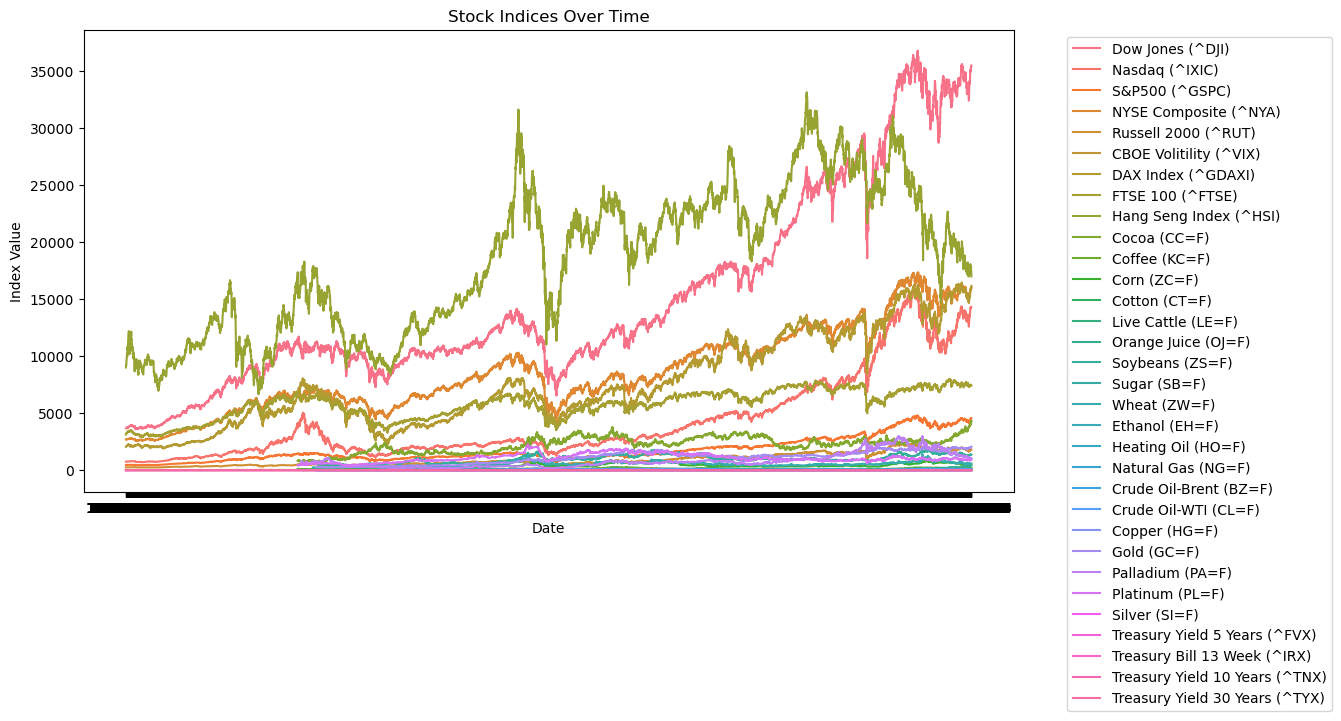

In [5]:
# Assuming 'Date' is a column in your DataFrame
# If not, replace it with the actual date column name
# stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# # Set the 'Date' column as the index
# stock_data.set_index('Date', inplace=True)

cols = ['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)',
        'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)',
        'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)',
        'Hang Seng Index (^HSI)', 'Cocoa (CC=F)', 'Coffee (KC=F)',
        'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)',
        'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)',
        'Wheat (ZW=F)', 'Ethanol (EH=F)', 'Heating Oil (HO=F)',
        'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)',
        'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)',
        'Silver (SI=F)', 'Treasury Yield 5 Years (^FVX)',
        'Treasury Bill 13 Week (^IRX)', 'Treasury Yield 10 Years (^TNX)',
        'Treasury Yield 30 Years (^TYX)']

# Melt the DataFrame to long format
melted_data = pd.melt(stock_data, id_vars='Date', value_vars=cols, var_name='Index', value_name='Index Value')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Index Value', hue='Index', data=melted_data)
plt.title('Stock Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


#### Box plot for commodities like Cocoa, Coffee, Corn, etc. 

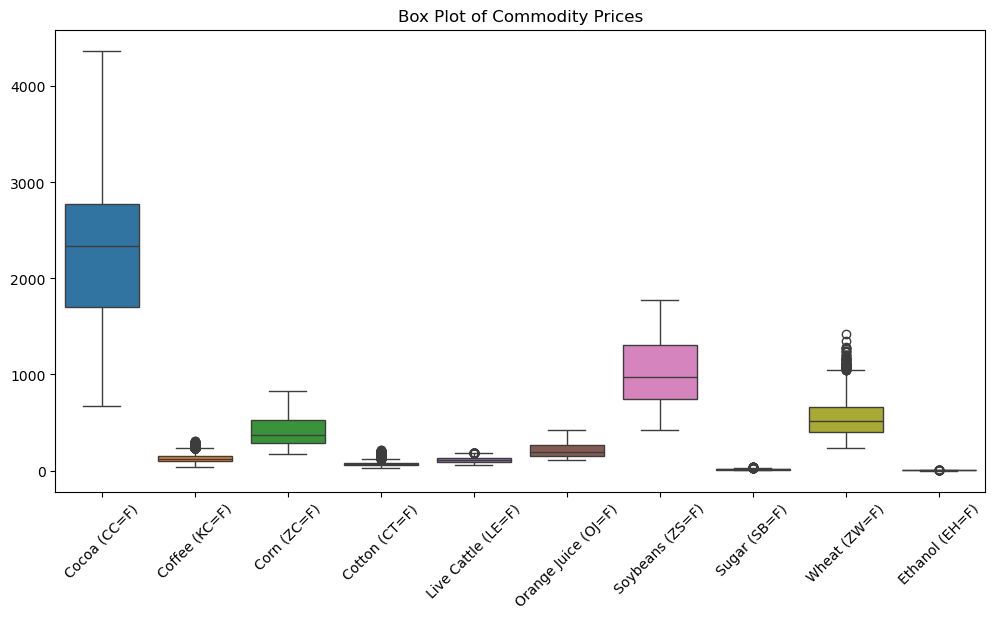

In [6]:

commodity_columns = ['Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)',
                     'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)']

plt.figure(figsize=(12, 6))
sns.boxplot(data=stock_data[commodity_columns])
plt.title('Box Plot of Commodity Prices')
plt.xticks(rotation=45)
plt.show()

####  Pairplot for selected numerical columns

C:\Users\Dell\.conda\envs\Machine Learning\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


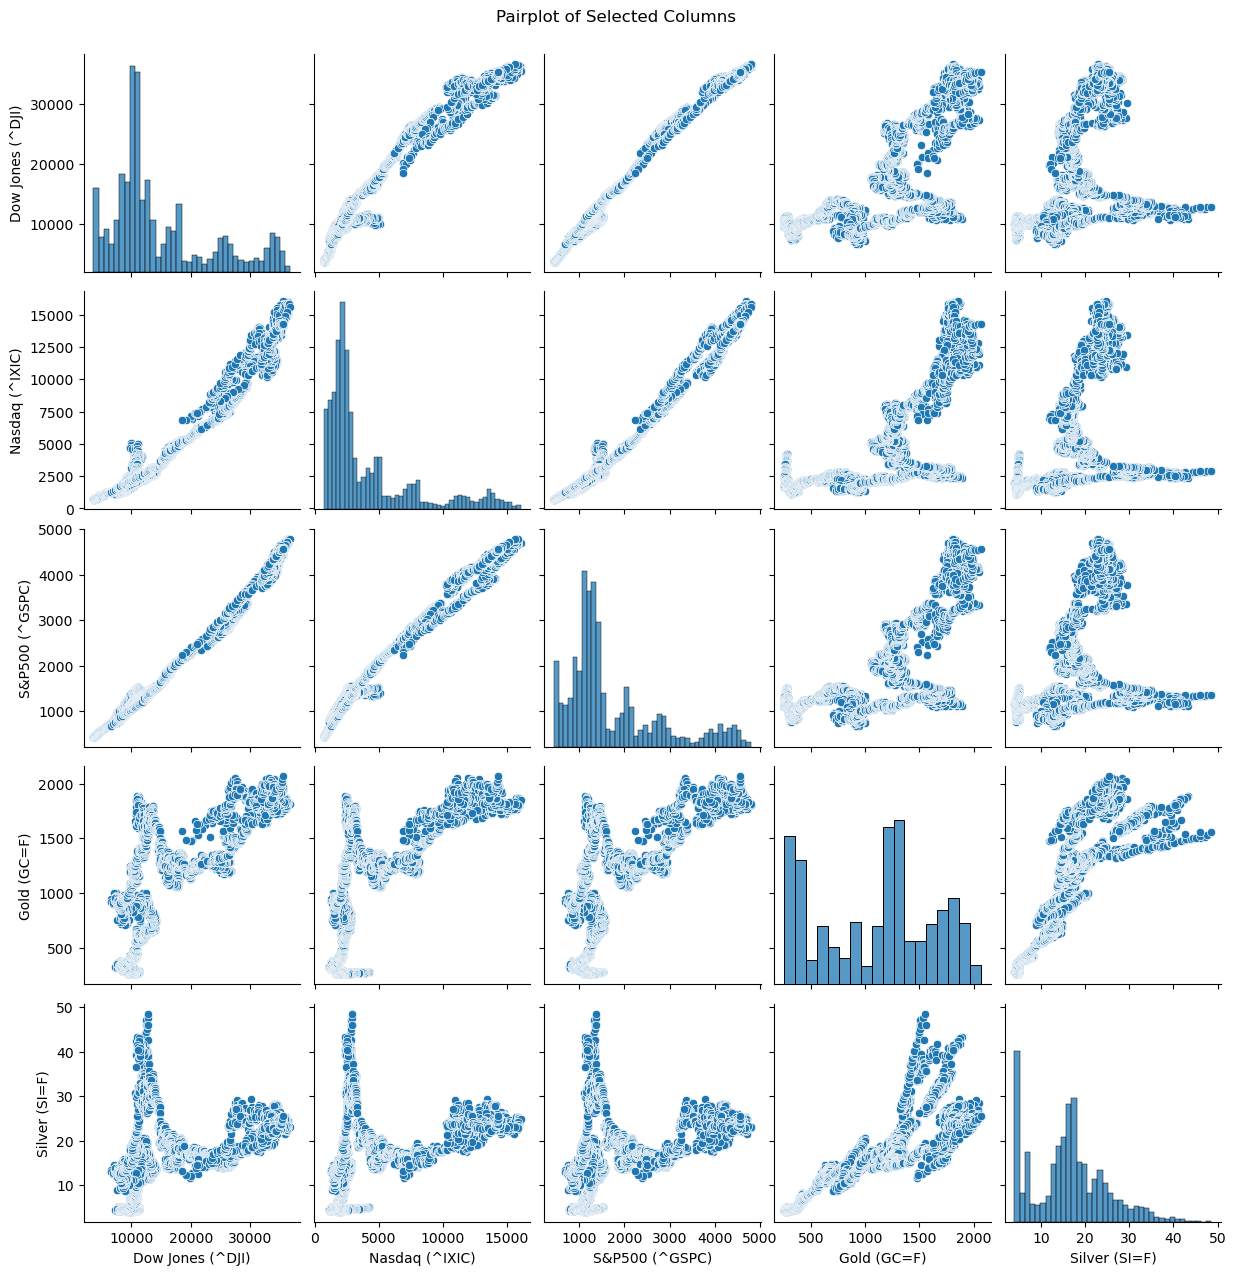

In [7]:
selected_columns = ['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'Gold (GC=F)', 'Silver (SI=F)']

sns.pairplot(stock_data[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

####  Calculating Returns: Compute daily, weekly, or monthly returns from the stock prices.
To calculate returns from stock prices, you can use the percentage change formula. The percentage change from one period to another is calculated as follows:

Percentage Change
=
Current Value
−
Previous Value
Previous Value
×
100
Percentage Change= 
Previous Value
Current Value−Previous Value
​
 ×100

Here's how you can implement this in Python using Pandas for daily, weekly, or monthly returns:

#### Daily Returns: 

In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set the 'Date' column as the index
stock_data.set_index('Date', inplace=True)

price_columns = ['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'NYSE Composite (^NYA)',
                 'Russell 2000 (^RUT)', 'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)',
                 'Hang Seng Index (^HSI)', 'Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)',
                 'Live Cattle (LE=F)', 'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)', 'Wheat (ZW=F)',
                 'Ethanol (EH=F)', 'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)',
                 'Crude Oil-WTI (CL=F)', 'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)',
                 'Silver (SI=F)', 'Treasury Yield 5 Years (^FVX)', 'Treasury Bill 13 Week (^IRX)',
                 'Treasury Yield 10 Years (^TNX)', 'Treasury Yield 30 Years (^TYX)']

# Calculate daily returns
returns_data = stock_data[price_columns].pct_change()

# Optionally, drop the first row with NaN values (since there's no return for the first day)
returns_data = returns_data.dropna()

# Print the first few rows of the returns data
print(returns_data.head(5))

            Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
Date                                                           
2021-09-08         -0.001964       -0.005704       -0.001319   
2021-09-09         -0.004330       -0.002511       -0.004606   
2021-09-10         -0.007789       -0.008707       -0.007723   
2021-09-13          0.007568       -0.000656        0.002276   
2021-09-14         -0.008376       -0.004490       -0.005747   

            NYSE Composite (^NYA)  Russell 2000 (^RUT)  \
Date                                                     
2021-09-08              -0.004175            -0.011373   
2021-09-09              -0.004060            -0.000267   
2021-09-10              -0.005980            -0.009595   
2021-09-13               0.004341             0.005939   
2021-09-14              -0.008305            -0.013745   

            CBOE Volitility (^VIX)  DAX Index (^GDAXI)  FTSE 100 (^FTSE)  \
Date                                                                

#### Weekly Returns: 

In [9]:
# Calculate weekly returns
returns_data_weekly = returns_data.resample('W-Mon').mean()

# Print the first few rows of the weekly returns data
print(returns_data_weekly.head(5))

            Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
Date                                                           
2021-09-13         -0.001629       -0.004394       -0.002843   
2021-09-20         -0.005179       -0.005188       -0.004982   
2021-09-27          0.005256        0.003475        0.003905   
2021-10-04         -0.004950       -0.009644       -0.006440   
2021-10-11          0.002904        0.003246        0.002829   

            NYSE Composite (^NYA)  Russell 2000 (^RUT)  \
Date                                                     
2021-09-13              -0.002468            -0.003824   
2021-09-20              -0.005647            -0.005206   
2021-09-27               0.005299             0.008935   
2021-10-04              -0.004833            -0.005549   
2021-10-11               0.002858             0.000325   

            CBOE Volitility (^VIX)  DAX Index (^GDAXI)  FTSE 100 (^FTSE)  \
Date                                                                

#### Monthly Returns: 

In [10]:
# Assuming you have a DataFrame named 'returns_data' with daily returns

# Resample the data to monthly frequency and calculate monthly returns
returns_data_monthly = returns_data.resample('M').prod() - 1

# Drop the first row with NaN values (since there's no return for the first month)
returns_data_monthly = returns_data_monthly.dropna()

# Print the first few rows of the monthly returns data
print(returns_data_monthly.head(5))


            Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
Date                                                           
2021-09-30              -1.0            -1.0            -1.0   
2021-10-31              -1.0            -1.0            -1.0   
2021-11-30              -1.0            -1.0            -1.0   
2021-12-31              -1.0            -1.0            -1.0   
2022-01-31              -1.0            -1.0            -1.0   

            NYSE Composite (^NYA)  Russell 2000 (^RUT)  \
Date                                                     
2021-09-30                   -1.0                 -1.0   
2021-10-31                   -1.0                 -1.0   
2021-11-30                   -1.0                 -1.0   
2021-12-31                   -1.0                 -1.0   
2022-01-31                   -1.0                 -1.0   

            CBOE Volitility (^VIX)  DAX Index (^GDAXI)  FTSE 100 (^FTSE)  \
Date                                                                

#### Statistical Analysis: Conduct statistical tests or calculate descriptive statistics to better understand the data. 

In [11]:
print("Sample of Daily Returns:")
print(returns_data.head())

Sample of Daily Returns:
            Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
Date                                                           
2021-09-08         -0.001964       -0.005704       -0.001319   
2021-09-09         -0.004330       -0.002511       -0.004606   
2021-09-10         -0.007789       -0.008707       -0.007723   
2021-09-13          0.007568       -0.000656        0.002276   
2021-09-14         -0.008376       -0.004490       -0.005747   

            NYSE Composite (^NYA)  Russell 2000 (^RUT)  \
Date                                                     
2021-09-08              -0.004175            -0.011373   
2021-09-09              -0.004060            -0.000267   
2021-09-10              -0.005980            -0.009595   
2021-09-13               0.004341             0.005939   
2021-09-14              -0.008305            -0.013745   

            CBOE Volitility (^VIX)  DAX Index (^GDAXI)  FTSE 100 (^FTSE)  \
Date                                       

####  Descriptive Statistics for Daily Returns

In [12]:
# Descriptive statistics for daily returns
returns_stats = returns_data.describe()

# Skewness and Kurtosis for daily returns
returns_stats.loc['skewness'] = returns_data.skew()
returns_stats.loc['kurtosis'] = returns_data.kurtosis()

# Print the summary statistics
print("\nDescriptive Statistics for Daily Returns:")
returns_stats


Descriptive Statistics for Daily Returns:


Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
count           578.000000      578.000000      578.000000   
mean              0.000069       -0.000004        0.000085   
std               0.009942        0.015658        0.011834   
min              -0.039417       -0.051591       -0.043237   
25%              -0.005400       -0.009620       -0.006979   
50%               0.000000        0.000000        0.000000   
75%               0.005625        0.009391        0.007083   
max               0.036951        0.073502        0.055434   
skewness         -0.117865       -0.028044       -0.071451   
kurtosis          1.306842        1.060076        1.420635   

          NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
count                578.000000           578.000000              578.000000   
mean                  -0.000031            -0.000287                0.001685   
std                    0.010469             0.014871                0.069329   
min                   -0.037676            -0.047598               -0.197764   
25%                   -0.006030            -0.010006               -0.041058   
50%                    0.000000             0.000000               -0.006901   
75%                    0.006132             0.009763                0.034101   
max                    0.044350             0.061083                0.540366   
skewness              -0.026320             0.087174                1.460094   
kurtosis               1.197991             0.598004                6.936473   

          DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  \
count             578.000000        578.000000              578.000000   
mean                0.000104          0.000103               -0.000621   
std                 0.011801          0.008760                0.016684   
min                -0.044083         -0.038836               -0.063563   
25%                -0.005911         -0.003866               -0.010957   
50%                 0.000410          0.000512               -0.000230   
75%                 0.006830          0.004659                0.007339   
max                 0.079213          0.039198                0.090818   
skewness            0.200823         -0.461941                0.762166   
kurtosis            4.511482          3.313157                3.387647   

          Cocoa (CC=F)  ...  Crude Oil-WTI (CL=F)  Copper (HG=F)  Gold (GC=F)  \
count       578.000000  ...            578.000000     578.000000   578.000000   
mean          0.000881  ...              0.000560      -0.000069     0.000283   
std           0.015334  ...              0.025707       0.015438     0.008811   
min          -0.052215  ...             -0.130629      -0.053606    -0.027866   
25%          -0.008210  ...             -0.015293      -0.010016    -0.004558   
50%           0.000837  ...              0.002439       0.000000     0.000162   
75%           0.010823  ...              0.016833       0.009730     0.004979   
max           0.055960  ...              0.083544       0.074642     0.031558   
skewness     -0.002259  ...             -0.529595       0.155346     0.080033   
kurtosis      0.649238  ...              2.201059       1.379523     1.026975   

          Palladium (PA=F)  Platinum (PL=F)  Silver (SI=F)  \
count           578.000000       578.000000     578.000000   
mean             -0.000989         0.000080       0.000234   
std               0.029098         0.018769       0.017669   
min              -0.136310        -0.059054      -0.050990   
25%              -0.018874        -0.012989      -0.010476   
50%              -0.001089         0.000000       0.000000   
75%               0.015997         0.011183       0.010083   
max               0.110494         0.057322       0.082226   
skewness          0.051406         0.184155       0.449094   
kurtosis          1.329724         0.233902       1.981388   

          Treasury Yield 5 Years (^FVX)  Treasury Bill 1

####  Correlation Matrix for Daily Returns

In [13]:
# You can also calculate correlation matrix for returns
returns_corr_matrix = returns_data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix for Daily Returns:")
print(returns_corr_matrix)


Correlation Matrix for Daily Returns:
                                Dow Jones (^DJI)  Nasdaq (^IXIC)  \
Dow Jones (^DJI)                        1.000000        0.839871   
Nasdaq (^IXIC)                          0.839871        1.000000   
S&P500 (^GSPC)                          0.946222        0.959533   
NYSE Composite (^NYA)                   0.954355        0.845682   
Russell 2000 (^RUT)                     0.846513        0.860564   
CBOE Volitility (^VIX)                 -0.711495       -0.693240   
DAX Index (^GDAXI)                      0.530166        0.483558   
FTSE 100 (^FTSE)                        0.444840        0.308582   
Hang Seng Index (^HSI)                  0.072050        0.140468   
Cocoa (CC=F)                            0.138529        0.083421   
Coffee (KC=F)                           0.073120        0.037443   
Corn (ZC=F)                            -0.037646       -0.055850   
Cotton (CT=F)                           0.111622        0.118112   
Live Catt

####  Statistical Analysis: Conduct statistical tests or calculate descriptive statistics to better understand the data.

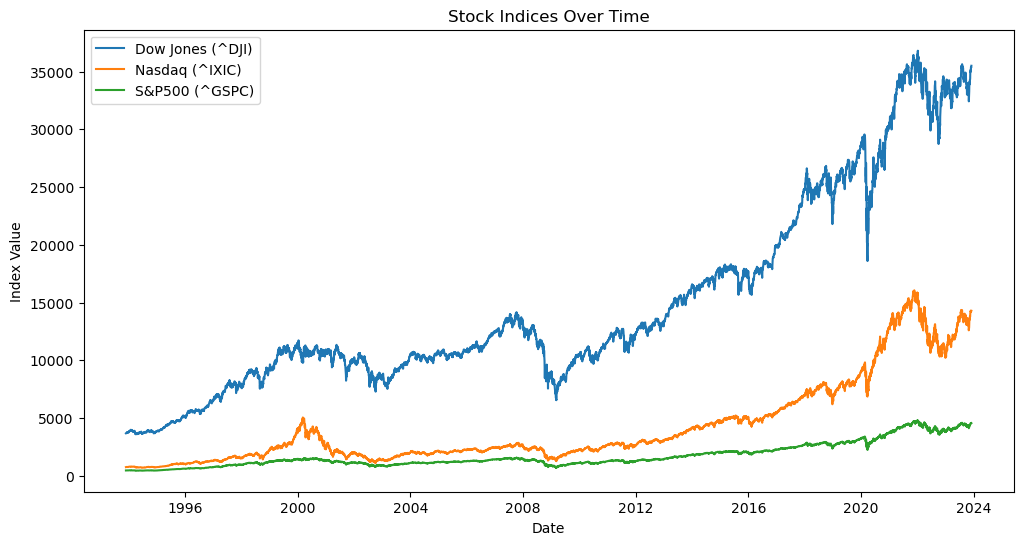

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for column in ['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)']:
    sns.lineplot(x='Date', y=column, data=stock_data, label=column)

plt.title('Stock Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()


In [15]:
import plotly.graph_objects as go

oil_data = stock_data[['Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)']].copy()

fig = go.Figure(data=[go.Candlestick(x=oil_data.index,
                                     open=oil_data['Crude Oil-Brent (BZ=F)'].shift(-1),
                                     high=oil_data[['Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)']].max(axis=1),
                                     low=oil_data[['Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)']].min(axis=1),
                                     close=oil_data['Crude Oil-Brent (BZ=F)'])])

fig.update_layout(title='Crude Oil Prices (Brent) - Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Oil Price',
                  xaxis_rangeslider_visible=False)
fig.show()


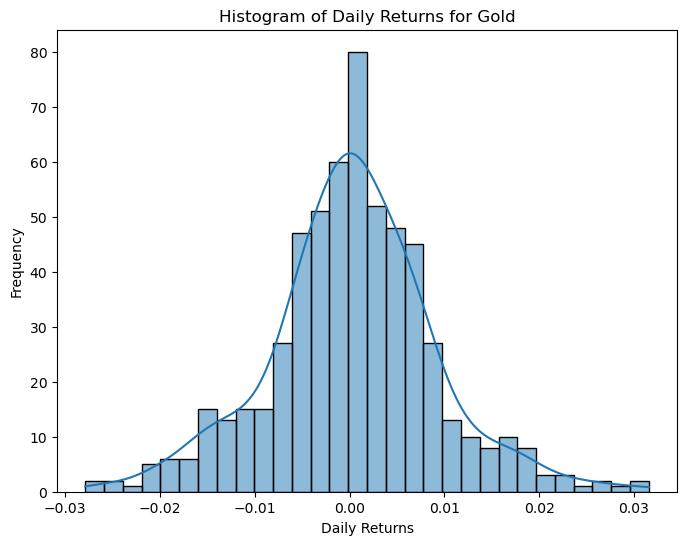

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(returns_data['Gold (GC=F)'].dropna(), bins=30, kde=True)
plt.title('Histogram of Daily Returns for Gold')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

####  Modeling: If you're interested in predictive modeling, you can use the data to train machine learning models for stock price prediction.

Mean Squared Error: 13376854.01661214


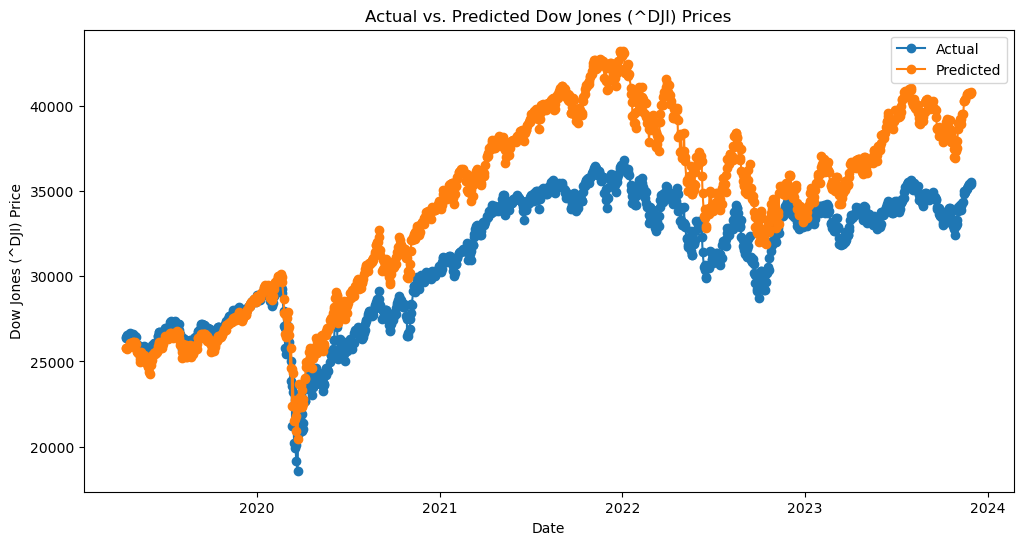

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Assuming you have a DataFrame named 'stock_data' with stock prices and returns calculated

# Choose a target variable (e.g., 'Dow Jones (^DJI)' for demonstration)
target_variable = 'Dow Jones (^DJI)'

# Select features for modeling (you can customize this based on your analysis)
features = ['Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'Gold (GC=F)', 'Crude Oil-WTI (CL=F)']

# Create a DataFrame with features and target variable
model_data = stock_data[features + [target_variable]].copy()
model_data['Date'] = stock_data.index

# Drop rows with missing values
model_data.dropna(inplace=True)

# Set 'Date' as the index
model_data.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(model_data) * 0.8)
train_data, test_data = model_data[:train_size], model_data[train_size:]

# Separate features and target variable for training and testing
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual', marker='o')
plt.plot(test_data.index, predictions, label='Predicted', marker='o')
plt.title(f'Actual vs. Predicted {target_variable} Prices')
plt.xlabel('Date')
plt.ylabel(f'{target_variable} Price')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

# ... (previous code for model training and predictions)

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Square Root of Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Square Root of Mean Squared Error (RMSE): {rmse}')


R-squared (R2) Score: 0.018127447061714652
Mean Squared Error (MSE): 13376854.01661214
Square Root of Mean Squared Error (RMSE): 3657.438176731377
